# Bank Marketing Prediction of a FD based on dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/INSPIRON/Desktop/Mtech 1st sem/Mtech project/Neural project/bank/bank-full.csv")
df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [2]:
X = df.iloc[:, 0:16].values
Y = df.iloc[:, 16].values
X

array([[58, 'management', 'married', ..., -1, 0, 'unknown'],
       [44, 'technician', 'single', ..., -1, 0, 'unknown'],
       [33, 'entrepreneur', 'married', ..., -1, 0, 'unknown'],
       ...,
       [72, 'retired', 'married', ..., 184, 3, 'success'],
       [57, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [37, 'entrepreneur', 'married', ..., 188, 11, 'other']],
      dtype=object)

# Encoding Values of dataset

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
Y=labelencoder_Y.fit_transform(Y)
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
for i in range(1,16):
    X[:,i]=labelencoder_X.fit_transform(X[:,i])
X

array([[58, 4, 1, ..., 0, 0, 3],
       [44, 9, 2, ..., 0, 0, 3],
       [33, 2, 1, ..., 0, 0, 3],
       ...,
       [72, 5, 1, ..., 181, 3, 2],
       [57, 1, 1, ..., 0, 0, 3],
       [37, 2, 1, ..., 185, 11, 1]], dtype=object)

In [6]:
X[0]

array([58, 4, 1, 2, 0, 3036, 1, 0, 2, 4, 8, 261, 0, 0, 0, 3], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)  # Ratioof train and test is 70-30


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Importing from  Keras 

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Creating a neural network with one hidden layer

In [60]:
#Adding the input layer and  hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid', input_dim = 16)) # input_dim is for no of inputs init is for weights value

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss =['mse'], metrics = ['accuracy','mse', 'cosine'])
#optimiser based on gardient descent but has an adaptive learning rate and is efficient in MLP
#binary_crossentropy 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=16, units=6, kernel_initializer="uniform")`
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


# Training the Model using Batch Learning

In [61]:
# Fitting our model 
history=classifier.fit(X_train, Y_train, batch_size = 10, epochs = 25,verbose=1)



Epoch 1/25
27126/27126 [==============================] - 5s 181us/step - loss: 0.1046 - acc: 0.8831 - mean_squared_error: 0.1046 - cosine_proximity: -0.1169
Epoch 2/25
27126/27126 [==============================] - 4s 136us/step - loss: 0.0805 - acc: 0.8831 - mean_squared_error: 0.0805 - cosine_proximity: -0.1169
Epoch 3/25
27126/27126 [==============================] - 4s 140us/step - loss: 0.0747 - acc: 0.8831 - mean_squared_error: 0.0747 - cosine_proximity: -0.1169
Epoch 4/25
27126/27126 [==============================] - 3s 126us/step - loss: 0.0732 - acc: 0.8946 - mean_squared_error: 0.0732 - cosine_proximity: -0.1169
Epoch 5/25
27126/27126 [==============================] - 4s 139us/step - loss: 0.0725 - acc: 0.8991 - mean_squared_error: 0.0725 - cosine_proximity: -0.1169
Epoch 6/25
27126/27126 [==============================] - 4s 130us/step - loss: 0.0721 - acc: 0.8981 - mean_squared_error: 0.0721 - cosine_proximity: -0.1169
Epoch 7/25
27126/27126 [============================

## Graph of Loss Function and Accuracy function 

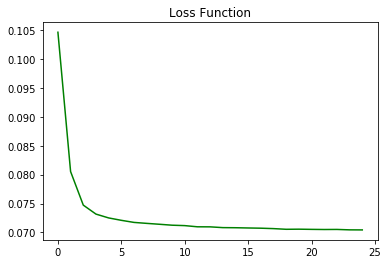

In [63]:
plt
#plt.plot(history.history['acc'])
plt.plot(history.history['loss'],'g')
plt.title('Loss Function')
plt.show()

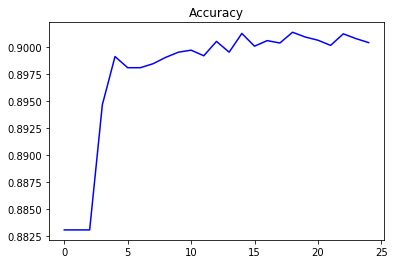

In [68]:

plt.plot(history.history['acc'],'b')
plt.title('Accuracy')
plt.show()

In [19]:
classifier.save("bank.model")


In [ ]:
# %load ('bank.model')
bank.model

In [71]:
classifier.predict(X_train, batch_size = 10)

array([[0.07102583],
       [0.52217734],
       [0.01850991],
       ...,
       [0.01953995],
       [0.01749077],
       [0.01874566]], dtype=float32)

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [73]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[15505,   463],
       [ 1322,   795]], dtype=int64)

In [74]:
#Confusion Matrix** 
# [[True Positive, True Negative],
  #[False Positive,False Negative]]

In [75]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
accuracy

0.9012994194083495

In [76]:

y_actu_pd = Y_test.T#pd.Series(Y_test.T, name='Actual')
y_pred_pd = y_pred.T#pd.Series(y_pred.T, name='Predicted')
y_actu_pd

#df_confusion = pd.crosstab(y_actu_pd, y_pred_pd)


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

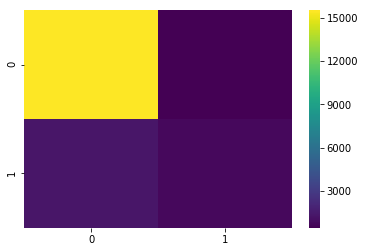

In [77]:
import seaborn as sns
sns.heatmap(cm,cmap='viridis')


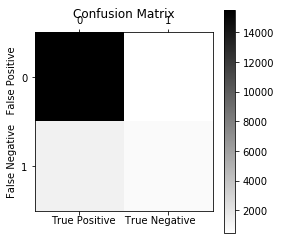

In [88]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion))
    #plt.xticks(tick_marks, df_confusion, rotation=45)
    #plt.yticks(tick_marks, df_confusion)
    #plt.tight_layout()
    plt.ylabel('False Negative   False Positive')
    plt.xlabel('True Positive   True Negative')
    plt.title('Confusion Matrix')
   

plot_confusion_matrix(cm)

# Now Prediction of a single data from Training and testing datasets

In [ ]:
for i in range (100):
    if Y_test[i]>0:
        print(i)


In [22]:
Y_test[23]

0

In [25]:
y_pred = classifier.predict(X_test[83:84])
if(y_pred>0.5):
    print('Yes')
else:
    print('No')


Yes


In [26]:
y_pred = classifier.predict(X_train[41:42])
if(y_pred>0.5):
    print('Yes')
else:
    print('No')

No


## As expected the model is predicting correctly most of the time
